## Dataset Description
There are 14 attributes in each case of the dataset. They are:
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000 dollars
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - percentage lower status of the population
14. MEDV - Median value of owner-occupied homes in 1000 dollars's

In [1]:
import pandas as pd
import os

In [2]:
path = r"C:\Users\Gianluca\Desktop\housing_dataset\data"
filename = os.path.join(path, "HousingData.csv")
data = pd.read_csv(filename)

In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

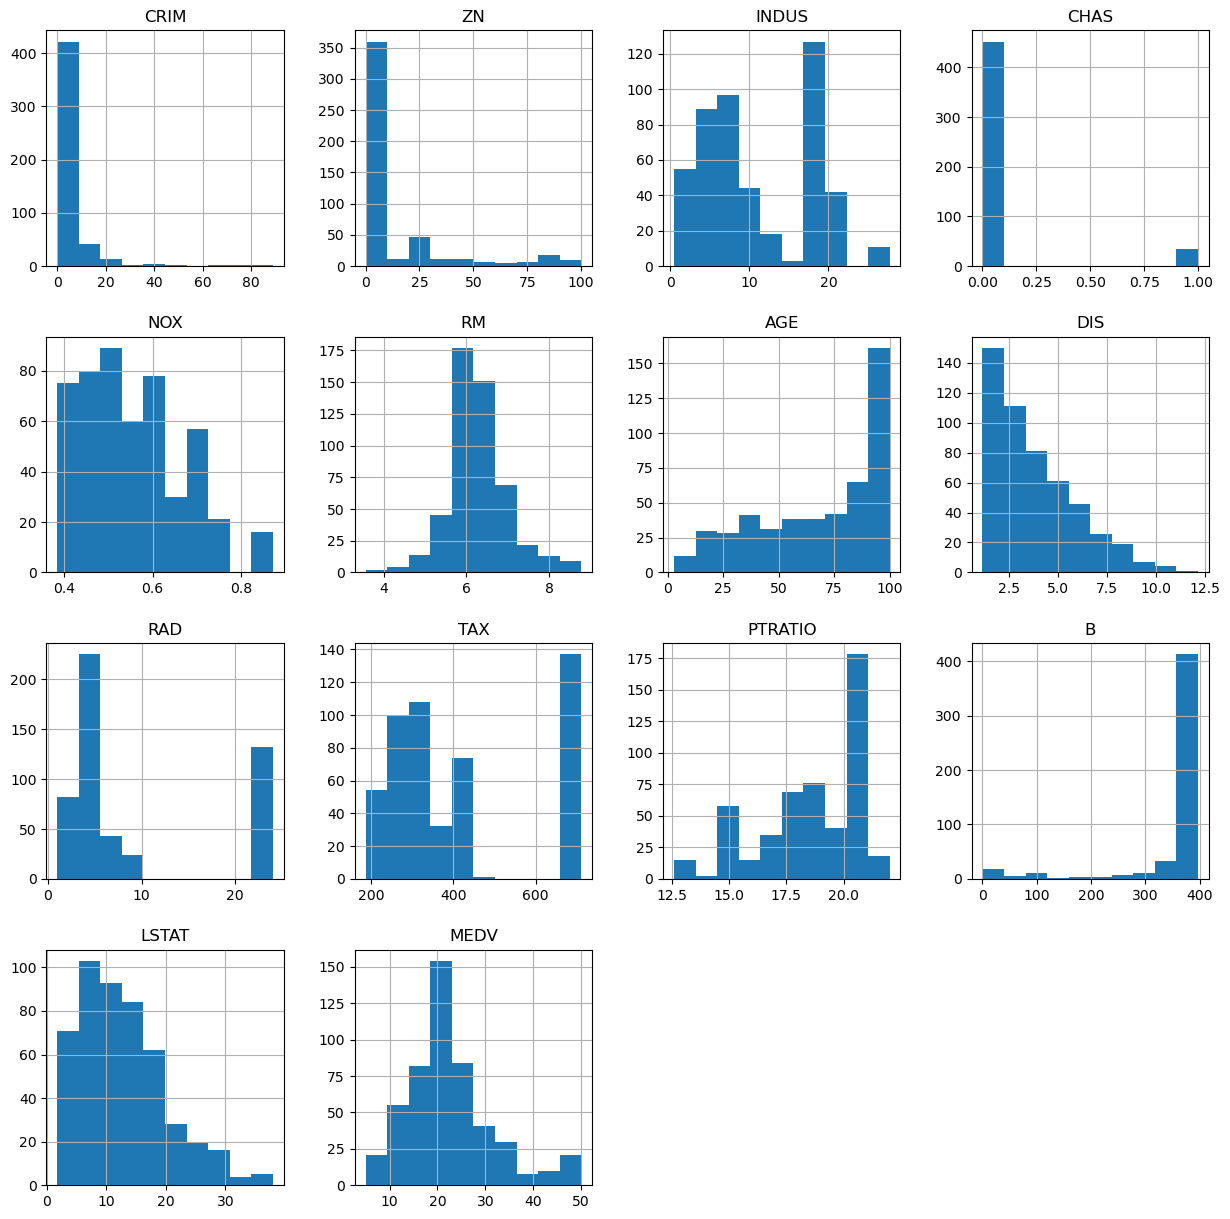

In [4]:
from matplotlib import pyplot as plt

data.hist(figsize=(15, 15))




## Imputing

In [5]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [6]:
# List of tuple to specify how to impute each field
impute_list = [
    ("CRIM", "most_frequent"),
    ("ZN", "most_frequent"),
    ("INDUS", "mean"),
    ("CHAS", "most_frequent"),
    ("NOX", "mean"),
    ("RM", "mean"),
    ("AGE", "median"),
    ("DIS", "mean"),
    ("RAD", "most_frequent"),
    ("TAX", "most_frequent"),
    ("PTRATIO", "mean"),
    ("B", "most_frequent"),
    ("LSTAT", "mean"),
    ("MEDV", "most_frequent")
]

In [7]:
imputer_list = []
for imputer, strat in impute_list:
    #print(strat)
    imputer_name = imputer + "_imputing"
    elem = (imputer_name, SimpleImputer(missing_values=np.nan, strategy=strat), [imputer])
    imputer_list.append(elem)

In [8]:
imputer_list

[('CRIM_imputing', SimpleImputer(strategy='most_frequent'), ['CRIM']),
 ('ZN_imputing', SimpleImputer(strategy='most_frequent'), ['ZN']),
 ('INDUS_imputing', SimpleImputer(), ['INDUS']),
 ('CHAS_imputing', SimpleImputer(strategy='most_frequent'), ['CHAS']),
 ('NOX_imputing', SimpleImputer(), ['NOX']),
 ('RM_imputing', SimpleImputer(), ['RM']),
 ('AGE_imputing', SimpleImputer(strategy='median'), ['AGE']),
 ('DIS_imputing', SimpleImputer(), ['DIS']),
 ('RAD_imputing', SimpleImputer(strategy='most_frequent'), ['RAD']),
 ('TAX_imputing', SimpleImputer(strategy='most_frequent'), ['TAX']),
 ('PTRATIO_imputing', SimpleImputer(), ['PTRATIO']),
 ('B_imputing', SimpleImputer(strategy='most_frequent'), ['B']),
 ('LSTAT_imputing', SimpleImputer(), ['LSTAT']),
 ('MEDV_imputing', SimpleImputer(strategy='most_frequent'), ['MEDV'])]

In [9]:
column_transformer = ColumnTransformer(imputer_list)
column_transformer.set_output(transform="pandas")

ColumnTransformer(transformers=[('CRIM_imputing',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['CRIM']),
                                ('ZN_imputing',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['ZN']),
                                ('INDUS_imputing', SimpleImputer(), ['INDUS']),
                                ('CHAS_imputing',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['CHAS']),
                                ('NOX_imputing', SimpleImputer(), ['NOX']),
                                ('RM_imputing', SimpleImputer(), ['RM...
                                ('RAD_imputing',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['RAD']),
                                ('TAX_imputing',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['TAX']),
                                ('PTRATIO_imputing', SimpleImputer(),
                                 ['PTRATIO']),
                                ('B_imputing',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['B']),
                                ('LSTAT_imputing', SimpleImputer(), ['LSTAT']),
                                ('MEDV_imputing',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['MEDV'])])

In [10]:
X_imputed = column_transformer.fit_transform(data)

In [11]:
X_imputed.describe()

,CRIM_imputing__CRIM,ZN_imputing__ZN,INDUS_imputing__INDUS,CHAS_imputing__CHAS,NOX_imputing__NOX,RM_imputing__RM,AGE_imputing__AGE,DIS_imputing__DIS,RAD_imputing__RAD,TAX_imputing__TAX,PTRATIO_imputing__PTRATIO,B_imputing__B,LSTAT_imputing__LSTAT,MEDV_imputing__MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.469705,10.768775,11.083992,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.574515,23.025124,6.699165,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.068907,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.224635,0.000000,9.900000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM_imputing__CRIM'}>,
        <Axes: title={'center': 'ZN_imputing__ZN'}>,
        <Axes: title={'center': 'INDUS_imputing__INDUS'}>,
        <Axes: title={'center': 'CHAS_imputing__CHAS'}>],
       [<Axes: title={'center': 'NOX_imputing__NOX'}>,
        <Axes: title={'center': 'RM_imputing__RM'}>,
        <Axes: title={'center': 'AGE_imputing__AGE'}>,
        <Axes: title={'center': 'DIS_imputing__DIS'}>],
       [<Axes: title={'center': 'RAD_imputing__RAD'}>,
        <Axes: title={'center': 'TAX_imputing__TAX'}>,
        <Axes: title={'center': 'PTRATIO_imputing__PTRATIO'}>,
        <Axes: title={'center': 'B_imputing__B'}>],
       [<Axes: title={'center': 'LSTAT_imputing__LSTAT'}>,
        <Axes: title={'center': 'MEDV_imputing__MEDV'}>, <Axes: >,
        <Axes: >]], dtype=object)

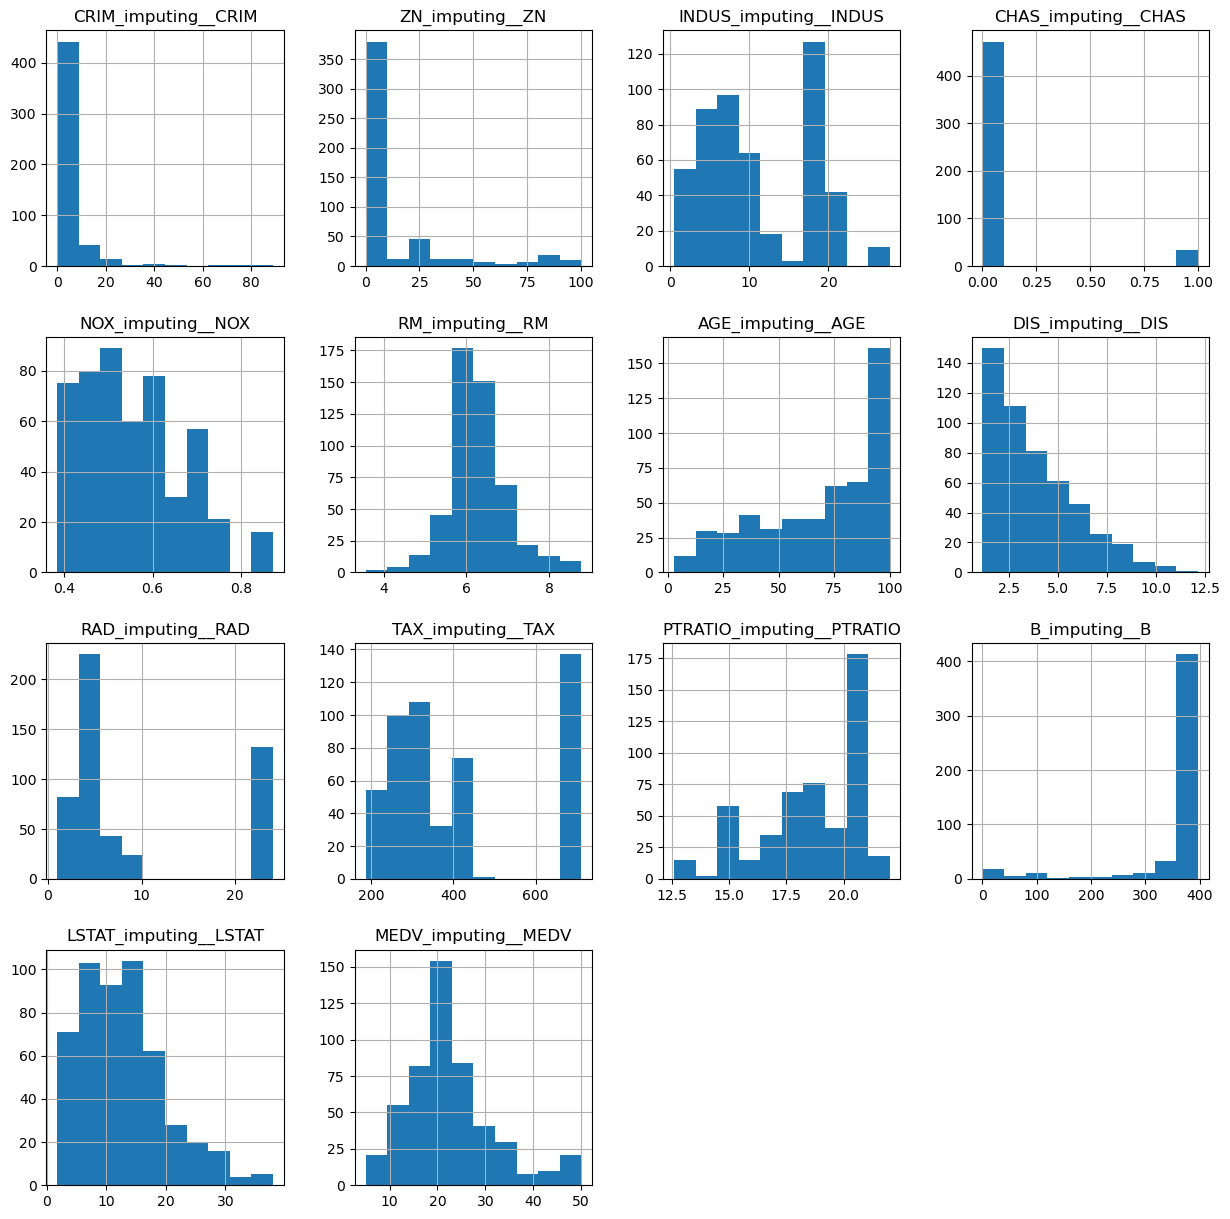

In [12]:
X_imputed.hist(figsize=(15, 15))

## Outlier Detection and removal

<Axes: >

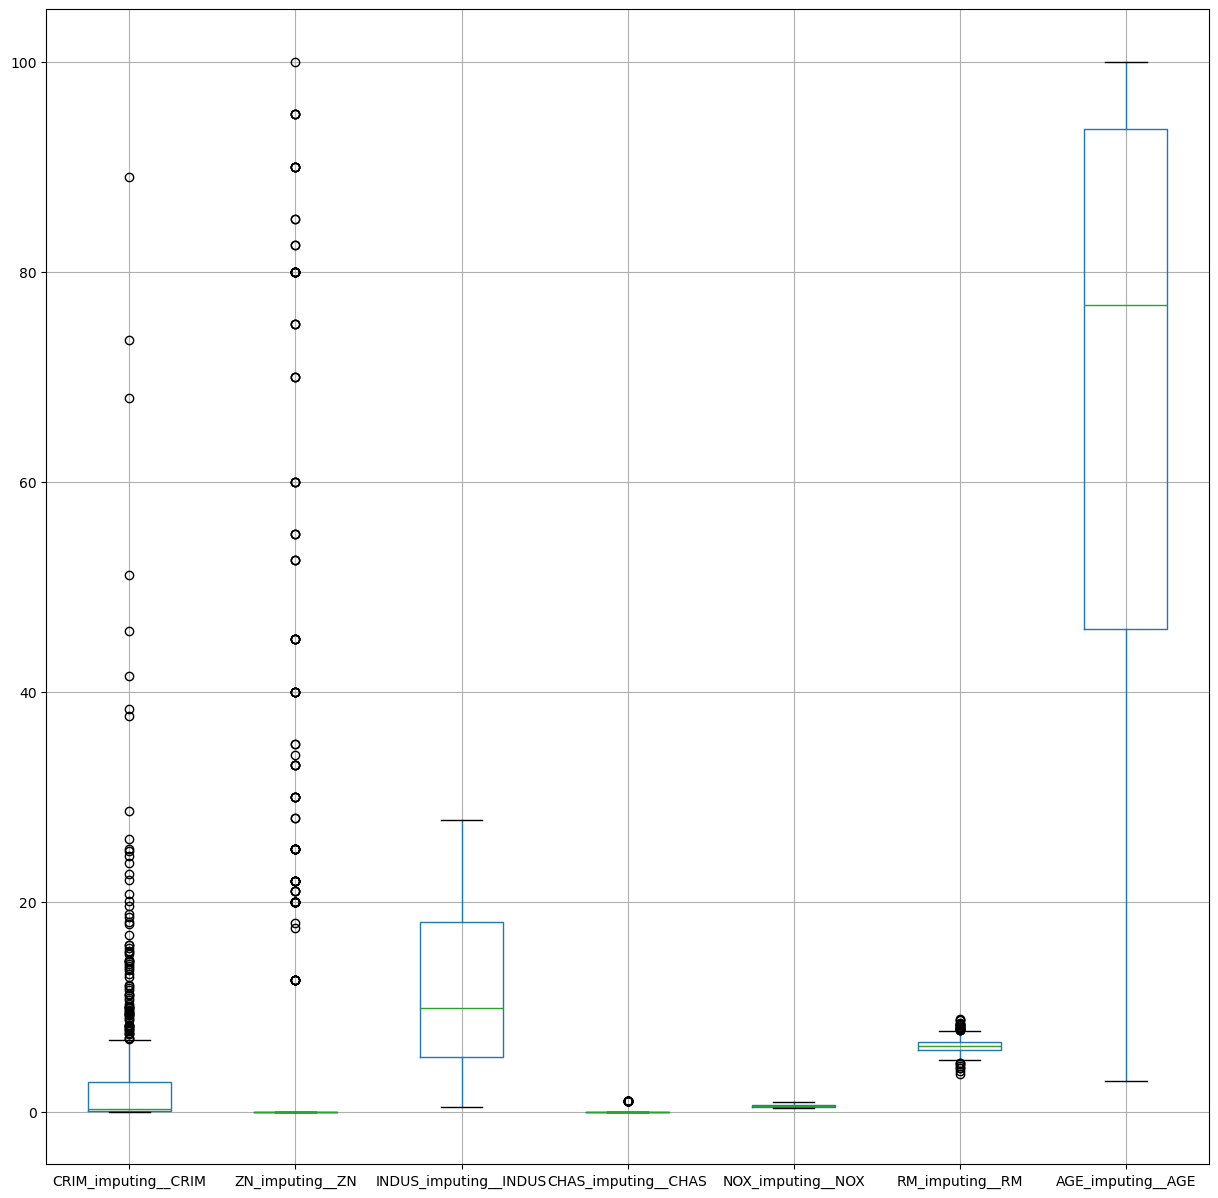

In [13]:
X_imputed.iloc[:,:7].boxplot(figsize=(15, 15))

In [14]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [15]:
def outlier_removal(data):
    # 25 percentile and 75 percentiles
    Q1 = data.quantile(0.25)
    Q2 = data.quantile(0.5)
    Q3 = data.quantile(0.75)
    
    # Interquartile range
    IQR = 1.5*(Q3 - Q1)
    
    # Lower range
    LOR = Q1 - IQR
    # Higher range
    HIR = Q3 + IQR
    
    # Checking if any value in a row is beyond the wisker for its column
    return data[((data < LOR) | (data > HIR)).any(axis=1)]

In [16]:
data_without_outlier = outlier_removal(X_imputed)

array([[<Axes: title={'center': 'CRIM_imputing__CRIM'}>,
        <Axes: title={'center': 'ZN_imputing__ZN'}>,
        <Axes: title={'center': 'INDUS_imputing__INDUS'}>,
        <Axes: title={'center': 'CHAS_imputing__CHAS'}>],
       [<Axes: title={'center': 'NOX_imputing__NOX'}>,
        <Axes: title={'center': 'RM_imputing__RM'}>,
        <Axes: title={'center': 'AGE_imputing__AGE'}>,
        <Axes: title={'center': 'DIS_imputing__DIS'}>],
       [<Axes: title={'center': 'RAD_imputing__RAD'}>,
        <Axes: title={'center': 'TAX_imputing__TAX'}>,
        <Axes: title={'center': 'PTRATIO_imputing__PTRATIO'}>,
        <Axes: title={'center': 'B_imputing__B'}>],
       [<Axes: title={'center': 'LSTAT_imputing__LSTAT'}>,
        <Axes: title={'center': 'MEDV_imputing__MEDV'}>, <Axes: >,
        <Axes: >]], dtype=object)

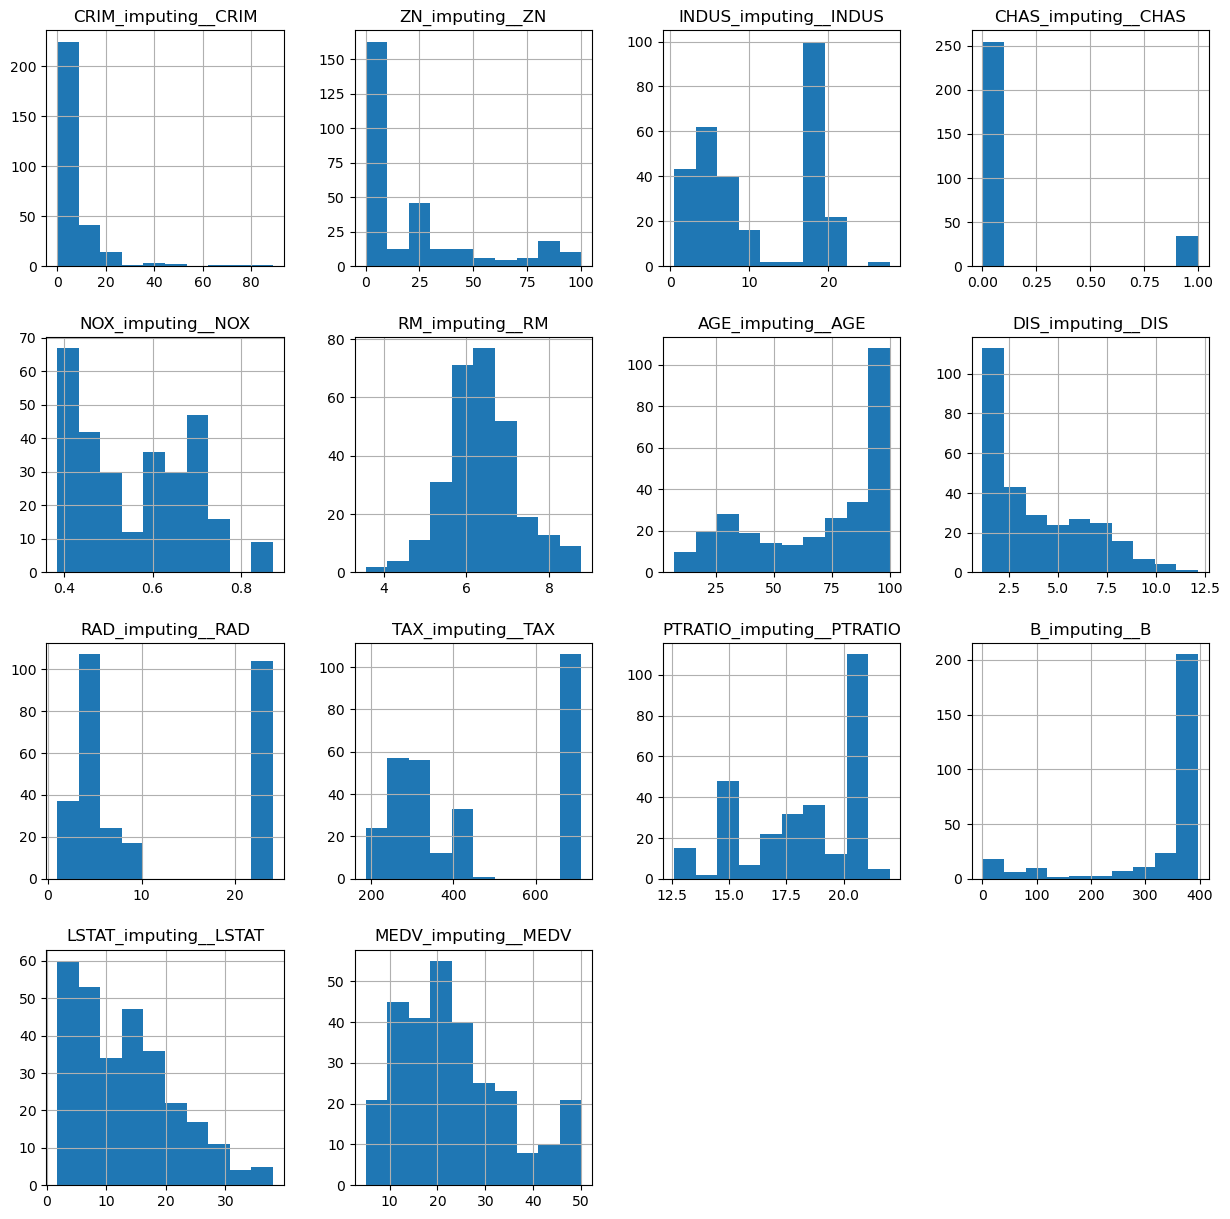

In [17]:
data_without_outlier.hist(figsize=(15, 15))

## Relations between features and labels

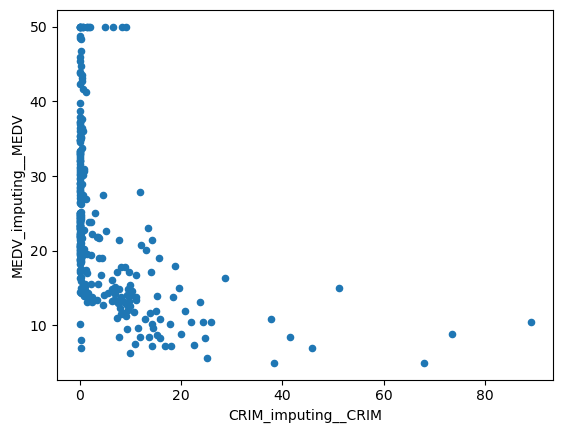

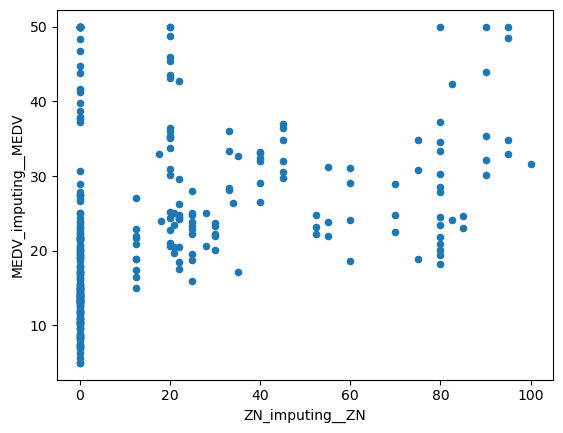

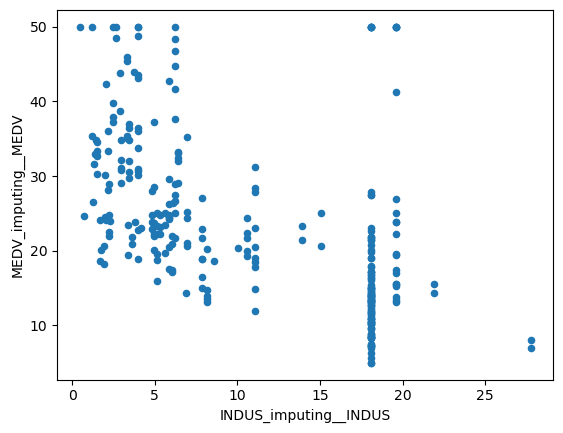

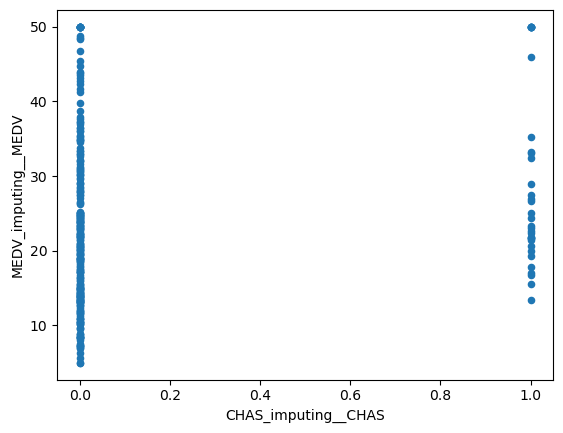

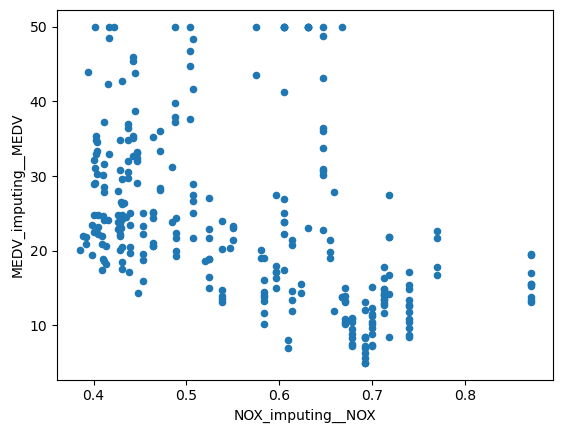

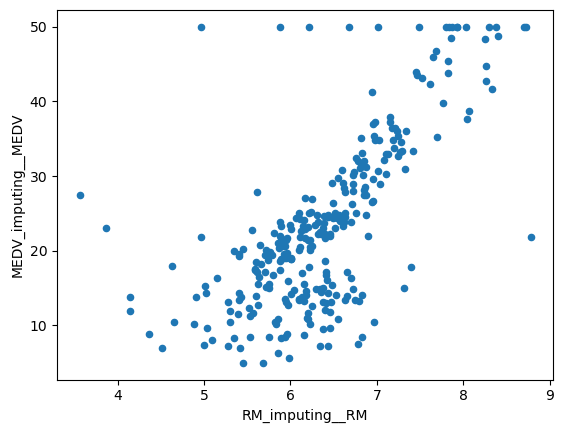

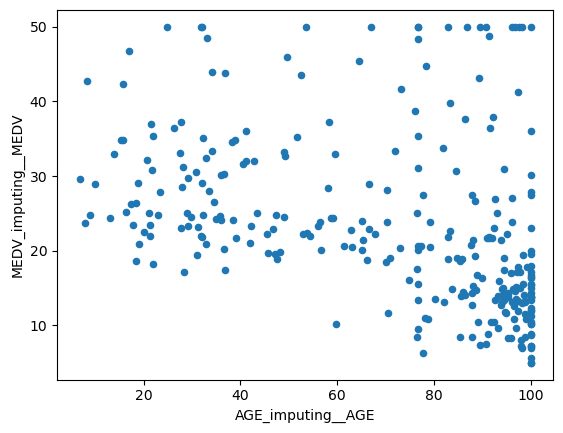

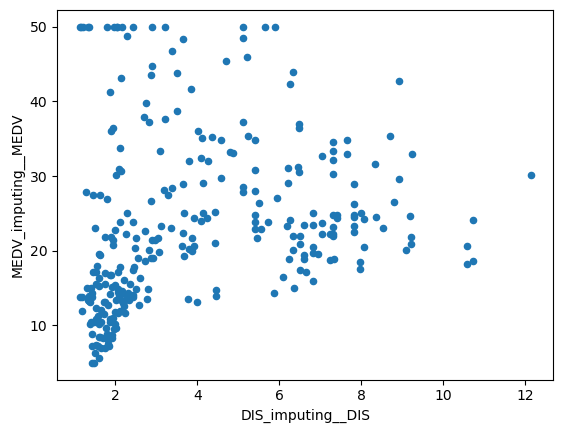

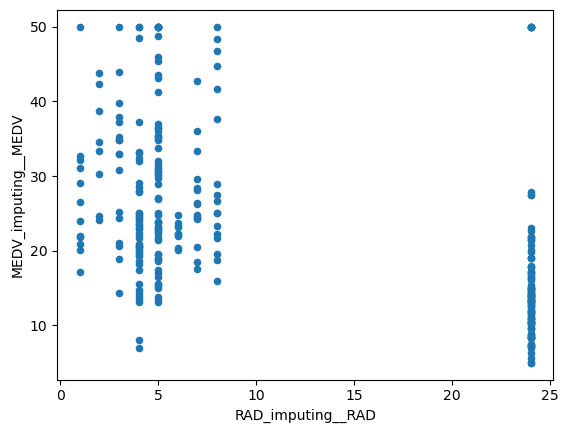

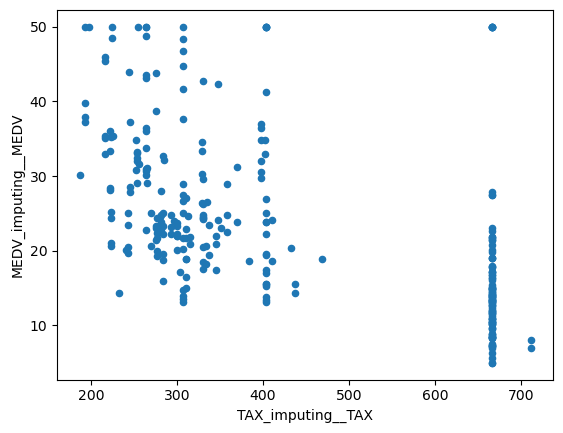

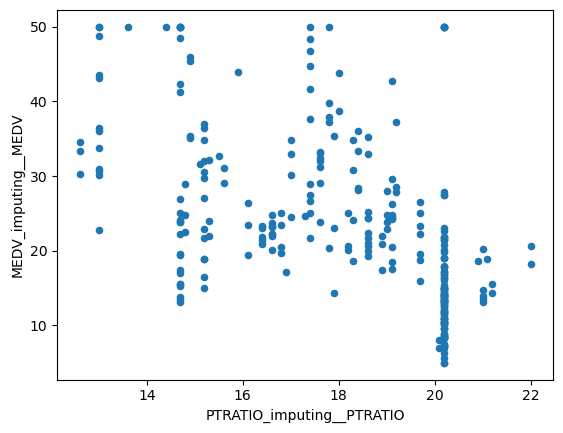

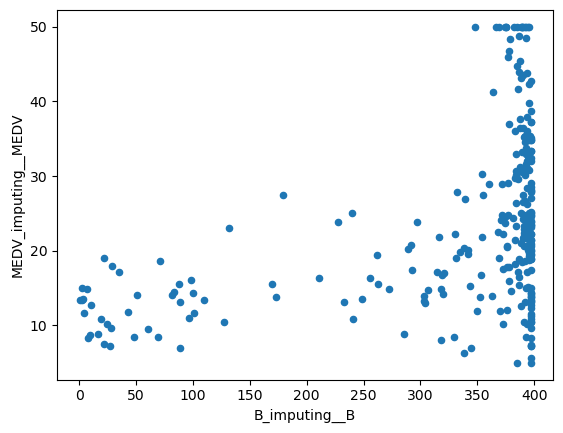

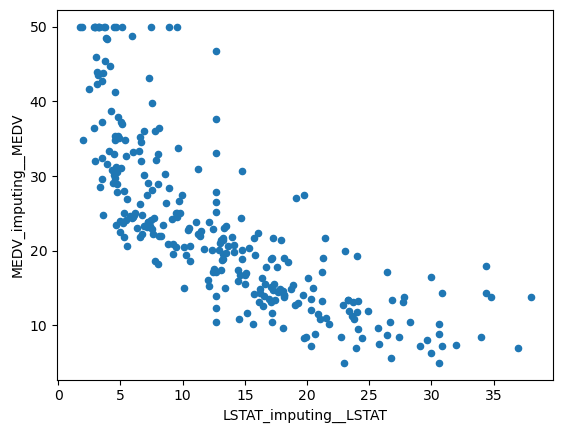

In [18]:
for ii in range(13):
    data_without_outlier.plot.scatter(x=ii, y=13)

In [19]:
# LSTAT, RM, 

In [20]:
# PLotting absolute value of the correlations
import matplotlib.pyplot as plt


def show_abs_correlations(data, cat_features=None, method='spearman'):
    
    # Removal of teh categorical features
    if cat_features != None:
        cols_to_include = [col for col in list(data.columns) if col not in cat_features]
        data = data[cols_to_include ]
    print(cols_to_include)
    
    # Creating the figure
    fig = plt.figure(figsize=(15, 15), dpi=80)
    ax = fig.add_subplot(111)

    # computing the asbolute value of the correlations
    abs_correlations = np.abs(data.corr(method=method))
    
    # Extracting the names of the features
    features_names = [ col.split('_')[0] for col in list(abs_correlations.columns)]
    
    cax = ax.matshow(abs_correlations, interpolation='none')
    fig.colorbar(cax)

    # axis range
    ax_range = range(-1, len(features_names))
    
    ax.set_xticks(ax_range)
    ax.set_yticks(ax_range)
    ax.set_xticklabels(['']+ features_names)
    ax.set_yticklabels(['']+ features_names)

    plt.show()

['CRIM_imputing__CRIM', 'ZN_imputing__ZN', 'INDUS_imputing__INDUS', 'NOX_imputing__NOX', 'RM_imputing__RM', 'AGE_imputing__AGE', 'DIS_imputing__DIS', 'RAD_imputing__RAD', 'TAX_imputing__TAX', 'PTRATIO_imputing__PTRATIO', 'B_imputing__B', 'LSTAT_imputing__LSTAT', 'MEDV_imputing__MEDV']


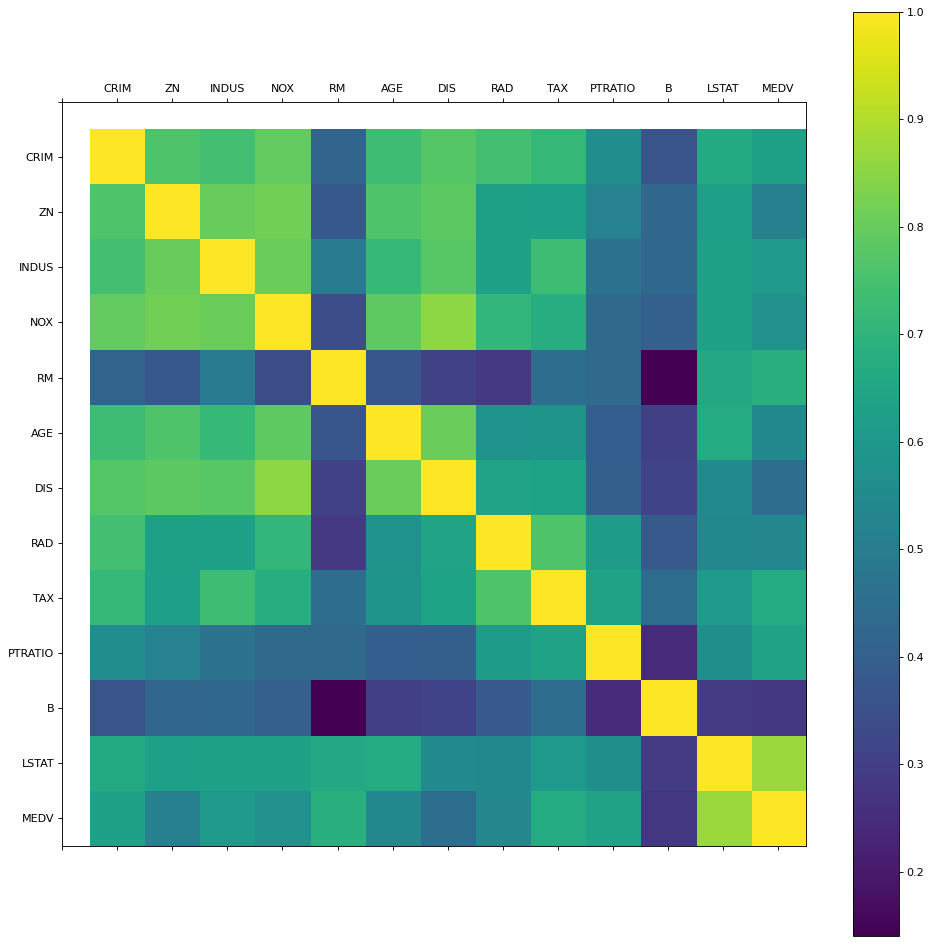

In [21]:
show_abs_correlations(data_without_outlier, ["CHAS_imputing__CHAS"])

<Axes: title={'center': 'MEDV_imputing__MEDV'}, xlabel='[CHAS_imputing__CHAS]'>

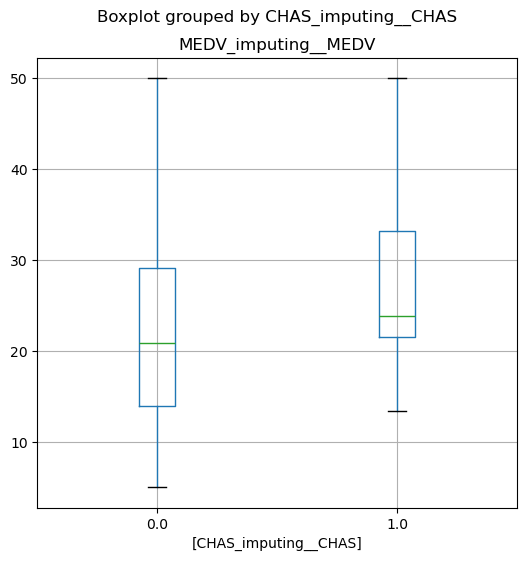

In [22]:
data_without_outlier[["CHAS_imputing__CHAS", "MEDV_imputing__MEDV"]].boxplot(by="CHAS_imputing__CHAS",figsize=(6, 6))

## Feature Selection and split in train/dev set

In [23]:
cols = ["LSTAT_imputing__LSTAT", "RM_imputing__RM", "MEDV_imputing__MEDV"]
data = data_without_outlier[cols]
data.rename(columns={"LSTAT_imputing__LSTAT": "LSTAT", "RM_imputing__RM": "RM", "MEDV_imputing__MEDV": "MEDV"}, inplace=True)

C:\Users\Gianluca\AppData\Local\Temp\ipykernel_11280\361626951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"LSTAT_imputing__LSTAT": "LSTAT", "RM_imputing__RM": "RM", "MEDV_imputing__MEDV": "MEDV"}, inplace=True)


In [24]:
X = data[["LSTAT","RM"]]
Y = data[["MEDV"]]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

## Polinomial Regression

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [28]:
from sklearn.base import TransformerMixin, BaseEstimator
import numpy as np

In [29]:
class transform(BaseEstimator, TransformerMixin):
    
    def __init__(self, kind):
        self.kind = kind
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        Xt = X.copy()
        if self.kind == 'sqrt':
            Xt = np.sqrt(X)
        elif self.kind == 'log':
            Xt = np.log(X)
        elif self.kind == 'cbrt':
            Xt = np.cbrt(X)

        return Xt       

In [30]:
cubic_root_transformer = transform('cbrt')

In [31]:
cubic_root_transformer.transform(X)

,LSTAT,RM
0,1.707693,1.873406
6,2.316454,1.818331
7,2.675405,1.834321
8,3.104814,1.779079
9,2.576313,1.817524
...,...,...
477,2.920505,1.743952
478,2.622197,1.835608
479,2.357948,1.839950
489,2.883297,1.755925


In [32]:
cbrt_transformer = transform('cbrt')
scaler = StandardScaler()
polinomial_features = PolynomialFeatures()
regressor = LinearRegression()
    
pipe = Pipeline([
    ('cbrt', cbrt_transformer),
    ('scaler', scaler),
    ('polinomial_features', polinomial_features),
    ('regressor', regressor)
])
    
degree_range = [i for i in range (1,10)]
param_grid = {'polinomial_features__degree': degree_range}
    
cv = GridSearchCV(estimator=pipe, param_grid= param_grid , cv=10, n_jobs=2, return_train_score=True)
cv.fit(X_train, Y_train)
    

scores = pd.DataFrame({'degree': degree_range,
              'mean_train_score': cv.cv_results_['mean_train_score'],
              'std_train_score': cv.cv_results_['std_train_score'],     
              'mean_validation_score': cv.cv_results_['mean_test_score'],
              'std_validation_score': cv.cv_results_['std_test_score']
             })

scores

,degree,mean_train_score,std_train_score,mean_validation_score,std_validation_score
0,1,0.708499,0.014920,6.255302e-01,1.716293e-01
1,2,0.808635,0.012541,7.599382e-01,1.397149e-01
2,3,0.812258,0.012449,7.442027e-01,1.686187e-01
3,4,0.823280,0.012634,7.532337e-01,1.691452e-01
4,5,0.832131,0.012427,2.645720e-01,1.524809e+00
5,6,0.798315,0.079206,-5.018800e-01,3.196843e+00
6,7,0.809025,0.046759,-3.929494e+03,1.135601e+04
7,8,0.817157,0.045005,-8.922355e+05,2.676592e+06
8,9,0.812258,0.132565,-1.373281e+08,4.119839e+08


In [33]:
cv.score(X_test, Y_test)

0.6752921968529428

In [34]:
Y_pred = cv.predict(X_test)

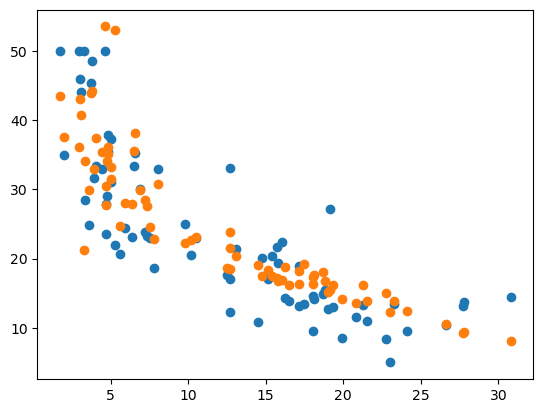

In [35]:
plt.scatter(X_test["LSTAT"], Y_test)
plt.scatter(X_test["LSTAT"], Y_pred)

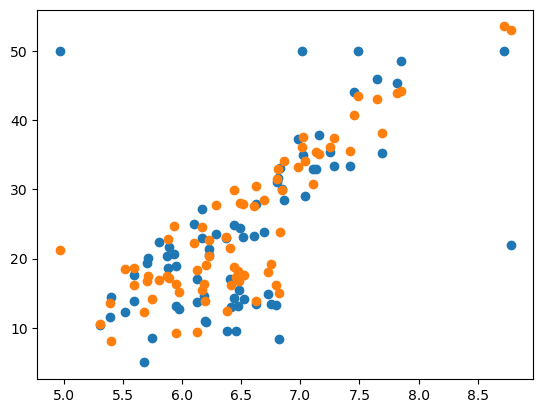

In [36]:
plt.scatter(X_test["RM"], Y_test)
plt.scatter(X_test["RM"], Y_pred)

In [37]:
test = Pipeline([
    ('cbrt', cbrt_transformer),
    ('scaler', scaler),
    ('regressor', regressor)
])

## Trying using Lasso

In [38]:
rename_dict = {}
for col in data_without_outlier.columns:
    rename_dict[col] = col.split('_')[0]
    
data_without_outlier.rename(columns=rename_dict, inplace=True)

C:\Users\Gianluca\AppData\Local\Temp\ipykernel_11280\729296019.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_outlier.rename(columns=rename_dict, inplace=True)


In [39]:
X = data_without_outlier[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

Y =  data_without_outlier['MEDV']

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

In [41]:
from sklearn.linear_model import Lasso

In [42]:
lasso_regressor = Lasso()

lasso_pipe = Pipeline([
    ('scaler', scaler),
    ('polinomial_features', polinomial_features),
    ('lasso_regressor', lasso_regressor)
])
    
degree_range = [i for i in range (1,4)]
alpha_range =[i*0.1 for i in range (0,10)]

In [43]:
param_grid = {'polinomial_features__degree': degree_range, 'lasso_regressor__alpha': alpha_range}
    
cv = GridSearchCV(estimator=lasso_pipe, param_grid= param_grid , cv=10, n_jobs=2, return_train_score=True)
cv.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polinomial_features',
                                        PolynomialFeatures()),
                                       ('lasso_regressor', Lasso())]),
             n_jobs=2,
             param_grid={'lasso_regressor__alpha': [0.0, 0.1, 0.2,
                                                    0.30000000000000004, 0.4,
                                                    0.5, 0.6000000000000001,
                                                    0.7000000000000001, 0.8,
                                                    0.9],
                         'polinomial_features__degree': [1, 2, 3]},
             return_train_score=True)

In [44]:
alpha = []
degree = []
for param in cv.cv_results_['params']:
    alpha.append(param['lasso_regressor__alpha'])
    degree.append(param['polinomial_features__degree'])

In [45]:
lasso_scores = pd.DataFrame({
              'alpha': alpha,
              'degree': degree,
              'mean_train_score': cv.cv_results_['mean_train_score'],
              'std_train_score': cv.cv_results_['std_train_score'],     
              'mean_validation_score': cv.cv_results_['mean_test_score'],
              'std_validation_score': cv.cv_results_['std_test_score']
             })

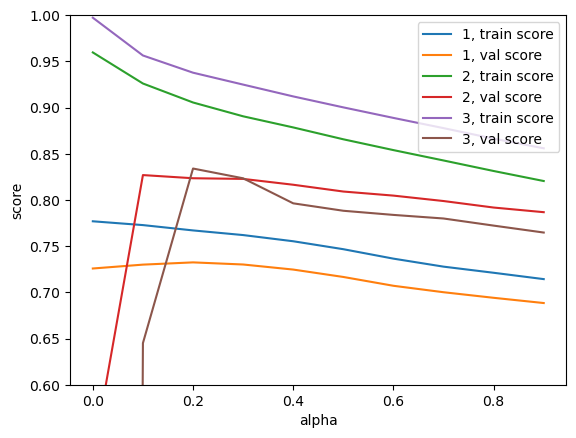

In [46]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

for deg in degree_range:
    df = lasso_scores[lasso_scores.degree==deg]
    label_train = str(deg)+ ', train score'
    label_val = str(deg)+ ', val score'
    ax.plot(df.alpha,df.mean_train_score,label=label_train)
    ax.plot(df.alpha,df.mean_validation_score,label=label_val)

ax.set_xlabel("alpha")
ax.set_ylabel("score")
ax.set_ylim(ymin=0.6, ymax=1.0)
ax.legend(loc='best')

In [47]:
X_train.shape[0], Y_test.shape[0]

(216, 73)

In [48]:
cv.score(X_test, Y_test)

0.7802483044317061

### PCA

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA()

In [51]:
pca_pipe = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('polinomial_features', polinomial_features),
    ('regressor', regressor)
])

In [52]:
n_components = [i for i in range (X_train.shape[1])]
param_grid = {'pca__n_components': n_components,'polinomial_features__degree': degree_range}

In [53]:
cv = GridSearchCV(estimator=pca_pipe, param_grid= param_grid , cv=10, n_jobs=2, return_train_score=True)
cv.fit(X_train, Y_train)

C:\Users\Gianluca\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 390.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Gianluca\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gianluca\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Gianluca\miniconda3\envs\ml\Lib\site-packages\sklearn\pipeline.py

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('polinomial_features',
                                        PolynomialFeatures()),
                                       ('regressor', LinearRegression())]),
             n_jobs=2,
             param_grid={'pca__n_components': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12],
                         'polinomial_features__degree': [1, 2, 3]},
             return_train_score=True)

In [54]:
alpha = []
degree = []
principal_components = []

for param in cv.cv_results_['params']:
    degree.append(param['polinomial_features__degree'])
    principal_components.append(param['pca__n_components'])

In [55]:
pca_scores = pd.DataFrame({
              'degree': degree,
              'principal_components': principal_components,
              'mean_train_score': cv.cv_results_['mean_train_score'],
              'std_train_score': cv.cv_results_['std_train_score'],     
              'mean_validation_score': cv.cv_results_['mean_test_score'],
              'std_validation_score': cv.cv_results_['std_test_score']
             })

In [56]:
cv.best_estimator_.score(X_test,Y_test)

0.7894356167862985

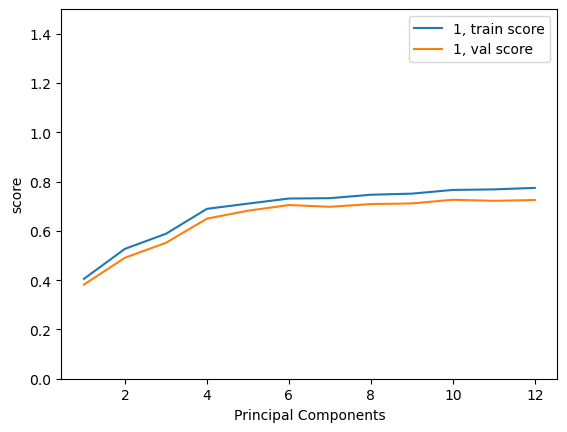

In [57]:
fig,ax = plt.subplots()
deg = 1
df = pca_scores[pca_scores.degree==deg]
label_train = str(deg)+ ', train score'
label_val = str(deg)+ ', val score'
ax.plot(df.principal_components,df.mean_train_score,label=label_train)
ax.plot(df.principal_components,df.mean_validation_score,label=label_val)

ax.set_xlabel("Principal Components")
ax.set_ylabel("score")
ax.set_ylim(ymin=0.0, ymax=1.5)
ax.legend(loc='best')

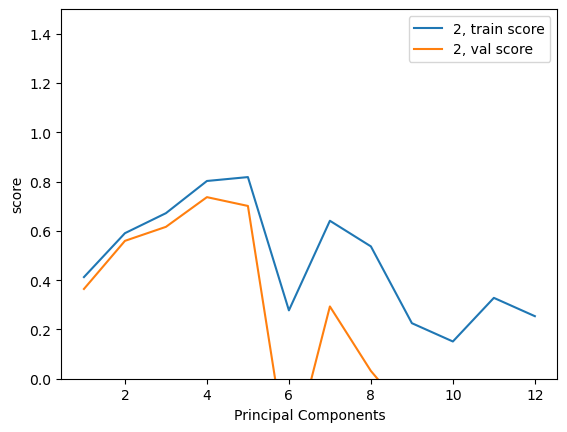

In [58]:
fig,ax = plt.subplots()
deg = 2
df = pca_scores[pca_scores.degree==deg]
label_train = str(deg)+ ', train score'
label_val = str(deg)+ ', val score'
ax.plot(df.principal_components,df.mean_train_score,label=label_train)
ax.plot(df.principal_components,df.mean_validation_score,label=label_val)

ax.set_xlabel("Principal Components")
ax.set_ylabel("score")
ax.set_ylim(ymin=0.0, ymax=1.5)
ax.legend(loc='best')

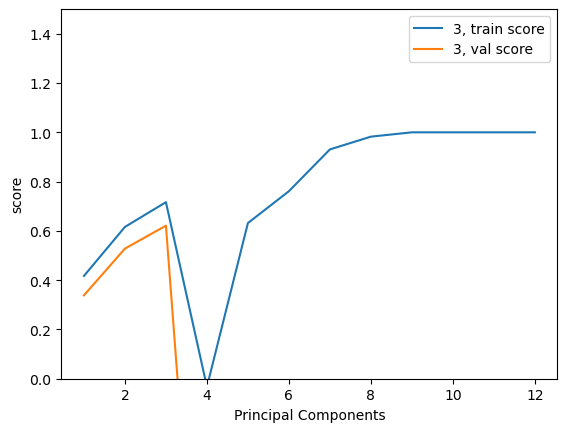

In [59]:
fig,ax = plt.subplots()
deg = 3
df = pca_scores[pca_scores.degree==deg]
label_train = str(deg)+ ', train score'
label_val = str(deg)+ ', val score'
ax.plot(df.principal_components,df.mean_train_score,label=label_train)
ax.plot(df.principal_components,df.mean_validation_score,label=label_val)

ax.set_xlabel("Principal Components")
ax.set_ylabel("score")
ax.set_ylim(ymin=0.0, ymax=1.5)
ax.legend(loc='best')